In [173]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydotplus
import seaborn as sns
import sklearn.tree as tree
from IPython.display import Image
from six import StringIO
from sklearn.datasets import load_breast_cancer, load_iris, load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Make Dataset
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']

temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

# Encode Data
encoder = LabelEncoder()
enc_weather = encoder.fit_transform(weather)
enc_temp = encoder.fit_transform(temp)
enc_label= encoder.fit_transform(play)
print ('Weather:', enc_weather)
print('Temp:', enc_temp)
print('Label:', enc_label)

Weather: [2 2 0 1 1 1 0 2 2 1 2 0 0 1]
Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Label: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [3]:
# Make Features from Weather and Temp
features = list(zip(enc_weather, enc_temp))
print('Features:\n', features)

Features:
 [(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [4]:
# Define Naive Bayes Model
model = GaussianNB()

#Train Model
model.fit(features, enc_label)

# Make Prediciton
prediction = model.predict(features)
print('Label:\n', enc_label)
print('Prediciton:\n', prediction)

# Evluate Model
acc = model.score(features, enc_label)
print('Accuracy on Training:\n', acc)

Label:
 [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
Prediciton:
 [0 0 1 1 1 1 1 0 0 1 0 1 1 1]
Accuracy on Training:
 0.7142857142857143


In [5]:
# Load Dataset
wine = load_wine()

print('Features:\n', wine.feature_names)
print('Labels:\n', wine.target_names)
print('Dataset Shape:\n', wine.data.shape)

Features:
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:
 ['class_0' 'class_1' 'class_2']
Dataset Shape:
 (178, 13)


In [6]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=.2, random_state=11)
print('Training Size:', X_train.shape[0])
print('Test Shape:', X_test.shape[0])
print(X_train[:2])
print(X_test[:2])

Training Size: 142
Test Shape: 36
[[1.386e+01 1.350e+00 2.270e+00 1.600e+01 9.800e+01 2.980e+00 3.150e+00
  2.200e-01 1.850e+00 7.220e+00 1.010e+00 3.550e+00 1.045e+03]
 [1.356e+01 1.730e+00 2.460e+00 2.050e+01 1.160e+02 2.960e+00 2.780e+00
  2.000e-01 2.450e+00 6.250e+00 9.800e-01 3.030e+00 1.120e+03]]
[[1.260e+01 2.460e+00 2.200e+00 1.850e+01 9.400e+01 1.620e+00 6.600e-01
  6.300e-01 9.400e-01 7.100e+00 7.300e-01 1.580e+00 6.950e+02]
 [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]]


In [7]:
# Train Model
model = GaussianNB().fit(X_train, y_train)

train_pred = model.predict(X_train)
train_acc = model.score(X_train, y_train)

test_pred = model.predict(X_test)
test_acc = model.score(X_test, y_test)

print('-- Training Performace --')
print('Target:\n', y_train)
print('Prediction:\n', train_pred)
print('Accuracy Score:', train_acc)
print()
print('-- Test Performance --')
print('Target:\n', y_test)
print('Prediction:\n', test_pred)
print('Accuracy Score:', test_acc)

-- Training Performace --
Target:
 [0 0 2 2 1 0 0 1 1 0 1 0 0 2 1 1 2 1 1 2 2 1 2 1 1 0 1 1 0 1 0 1 1 1 2 0 2
 1 0 0 2 2 0 0 1 2 2 1 2 1 0 1 1 0 2 0 0 0 2 0 1 1 1 2 0 1 2 1 2 2 1 1 1 2
 0 2 0 0 2 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 2 1 1 2 0 2 2 2 2 0 0 0 2 1 1 2 0
 1 1 2 1 1 1 2 2 2 2 0 1 1 2 0 2 1 0 2 1 1 0 1 1 2 1 0 1 1 1 2]
Prediction:
 [0 0 2 2 1 0 0 1 1 0 1 0 0 2 1 2 2 1 1 2 2 1 2 1 1 0 1 1 0 1 0 1 1 1 2 0 2
 1 0 0 2 2 0 0 1 2 2 1 2 1 0 1 1 0 2 0 0 0 2 0 1 1 1 2 0 1 2 1 2 2 1 1 1 2
 0 2 0 0 2 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 2 1 1 2 0 2 2 2 2 0 0 0 2 1 1 2 0
 1 1 2 1 1 1 2 2 2 2 0 1 1 2 0 2 1 0 2 1 1 0 1 1 2 1 0 1 1 1 2]
Accuracy Score: 0.9859154929577465

-- Test Performance --
Target:
 [2 0 1 0 0 0 1 1 1 0 2 1 0 0 1 1 0 2 1 1 0 2 0 0 0 1 0 1 1 0 1 1 2 1 2 2]
Prediction:
 [2 0 1 0 0 0 1 1 1 0 2 1 0 0 1 1 0 2 1 1 0 2 0 0 0 1 0 1 1 0 1 1 2 1 2 2]
Accuracy Score: 1.0


## Decison Tree

In [8]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [46]:
features_cols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes[features_cols]
y = diabetes['Outcome']
print('Dataset Shape:', X.shape)

Dataset Shape: (768, 8)


In [47]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=11)
print('Training Size:', X_train.shape[0])
print('Test Size:', X_test.shape[0])

Training Size: 537
Test Size: 231


In [50]:
# Train Random Forest
clf = RandomForestClassifier(n_estimators=20, random_state=1)
train_model(clf, X_train, X_test, y_train, y_test)

-- Training Performace --
Target:
 409    1
63     0
61     1
405    0
747    0
473    0
448    1
83     0
124    1
492    0
Name: Outcome, dtype: int64
Prediction:
 [1 0 1 0 0 0 1 0 1 0]
Accuracy Score: 0.9981378026070763

-- Test Performance --
Target:
 210    0
340    0
649    0
477    0
432    0
60     0
341    0
278    0
153    0
46     0
Name: Outcome, dtype: int64
Prediction:
 [0 0 0 0 0 0 0 0 0 1]
Accuracy Score: 0.7575757575757576


In [21]:
# Train Decision Tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

train_pred = clf.predict(X_train)
train_acc = clf.score(X_train, y_train)

test_pred = clf.predict(X_test)
test_acc = clf.score(X_test, y_test)

print('-- Training Performace --')
print('Target:\n', y_train.values[:10])
print('Prediction:\n', train_pred[:10])
print('Accuracy Score:', train_acc)
print()
print('-- Test Performance --')
print('Target:\n', y_test.values[:10])
print('Prediction:\n', test_pred[:10])
print('Accuracy Score:', test_acc)

-- Training Performace --
Target:
 [1 0 1 0 0 0 1 0 1 0]
Prediction:
 [1 0 1 0 0 0 1 0 1 0]
Accuracy Score: 1.0

-- Test Performance --
Target:
 [0 0 0 0 0 0 0 0 0 0]
Prediction:
 [0 0 0 0 0 0 1 0 1 1]
Accuracy Score: 0.7056277056277056


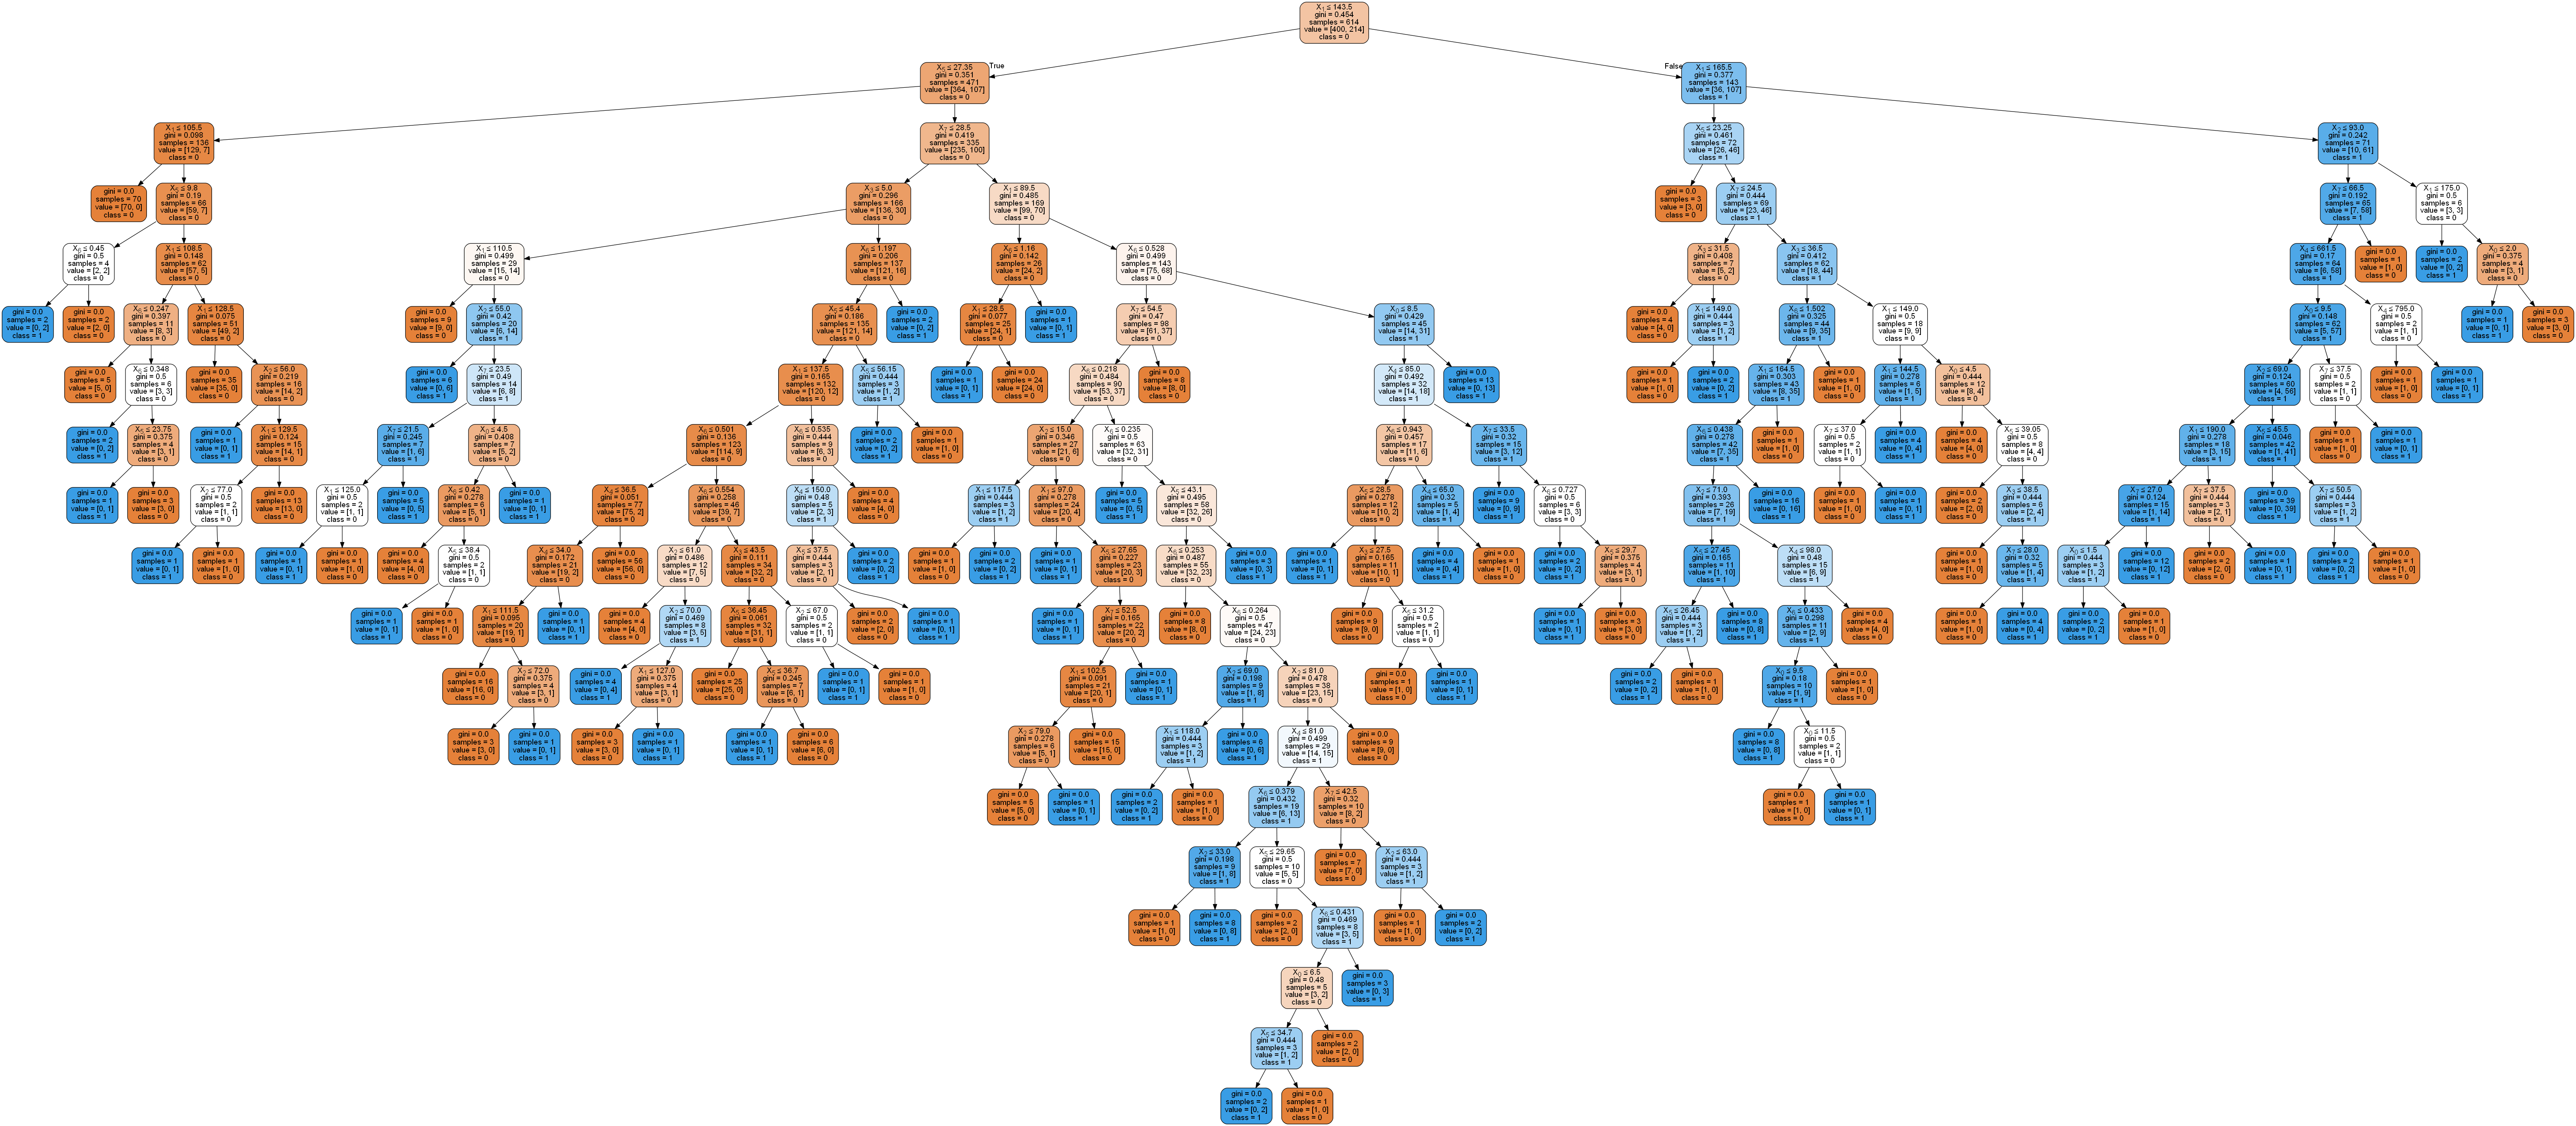

In [13]:
dot_data = StringIO()
tree.export_graphviz(
     clf, 
     out_file=dot_data, 
     class_names=['0','1'], # the target names.
     filled=True, # Whether to fill in the boxes with colours.
     rounded=True, # Whether to round the corners of the boxes.
     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [161]:
def train_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    train_acc = model.score(X_train, y_train)

    test_pred = model.predict(X_test)
    test_acc = model.score(X_test, y_test)

    print('-- Training Performace --')
#     print('Target:\n', y_train.values[:10])
    print('Target:\n', y_train[:10])
    print('Prediction:\n', train_pred[:10])
    print('Accuracy Score:', train_acc)
    print()
    print('-- Test Performance --')
#     print('Target:\n', y_test.values[:10])
    print('Target:\n', y_test[:10])
    print('Prediction:\n', test_pred[:10])
    print('Accuracy Score:', test_acc)
    
    print(classification_report(y_test, test_pred))

def visualize_tree(clf, class_name):
    dot_data = StringIO()
    tree.export_graphviz(
        clf,
        out_file=dot_data,
        class_names=class_name,
        filled=True,
        special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph
    

-- Training Performace --
Target:
 [1 0 1 0 0 0 1 0 1 0]
Prediction:
 [1 0 0 0 0 0 0 0 0 0]
Accuracy Score: 0.7597765363128491

-- Test Performance --
Target:
 [0 0 0 0 0 0 0 0 0 0]
Prediction:
 [0 0 0 0 0 0 0 0 1 1]
Accuracy Score: 0.7272727272727273


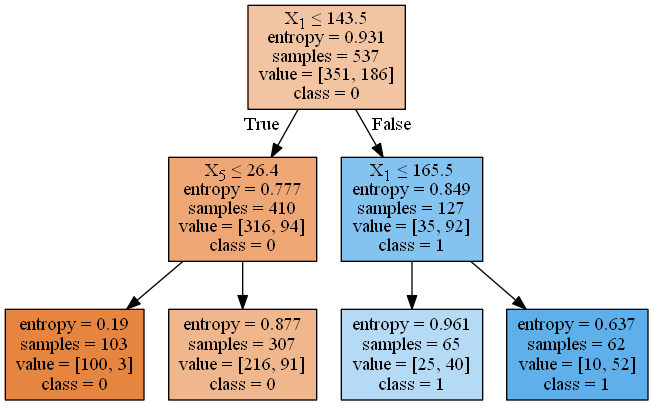

In [26]:
clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth = 2,
    random_state=11)
train_model(clf, X_train, X_test, y_train, y_test)
graph = visualize_tree(clf, ['0', '1'])
Image(graph.create_png())

## Random Forest

In [73]:
iris = load_iris()
print('Features:\n', iris.feature_names)
print('Label:\n', iris.target_names)

Features:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Label:
 ['setosa' 'versicolor' 'virginica']


In [74]:
X = iris.data
y = iris.target
print(X[:5])
print(y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [75]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=11)
print('Training Size:', X_train.shape[0])
print('Test Size:', X_test.shape[0])

Training Size: 105
Test Size: 45


In [145]:
clf = RandomForestClassifier(n_estimators=100)
train_model(clf, X_train, X_test, y_train, y_test)

-- Training Performace --
Target:
 [1 1 0 2 0 2 2 1 2 1]
Prediction:
 [1 1 0 2 0 2 2 1 2 1]
Accuracy Score: 0.9904761904761905

-- Test Performance --
Target:
 [2 2 2 1 2 0 1 0 0 1]
Prediction:
 [2 2 1 1 2 0 1 0 0 1]
Accuracy Score: 0.9111111111111111


In [122]:
clf.feature_importances_

array([0.09800711, 0.03347475, 0.34093843, 0.52757971])

In [123]:
print('Feature Impotances:\n', clf.feature_importances_)
print('Features:\n', iris.feature_names)

Feature Impotances:
 [0.09800711 0.03347475 0.34093843 0.52757971]
Features:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [126]:
feature_imp = pd.Series(clf.feature_importances_, index = iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.527580
petal length (cm)    0.340938
sepal length (cm)    0.098007
sepal width (cm)     0.033475
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


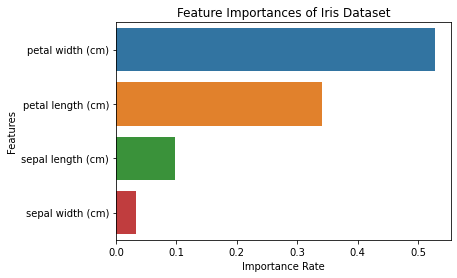

In [129]:
# Plot Feature Importances
sns.barplot(feature_imp, y=feature_imp.index)
plt.title('Feature Importances of Iris Dataset')
plt.xlabel('Importance Rate')
plt.ylabel('Features')
plt.show()

In [149]:
print('Features:', iris.feature_names)
X_imp = X[:, 2:]
print()
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size=.3, random_state=11)
print('Training Size:', X_train.shape)
print('Test Size:', X_test.shape)
print()
# Train Model
clf = RandomForestClassifier(n_estimators=100)
train_model(clf, X_train, X_test, y_train, y_test)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Training Size: (105, 2)
Test Size: (45, 2)

-- Training Performace --
Target:
 [1 1 0 2 0 2 2 1 2 1]
Prediction:
 [1 1 0 2 0 2 2 1 2 1]
Accuracy Score: 0.9904761904761905

-- Test Performance --
Target:
 [2 2 2 1 2 0 1 0 0 1]
Prediction:
 [2 2 1 1 2 0 1 0 0 1]
Accuracy Score: 0.9111111111111111


## Support Vector Machine (SVM)

In [156]:
cancer = load_breast_cancer()

In [157]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=.3, random_state=11)
print('Training Size:', X_train.shape)
print('Test Size:', X_test.shape)

Training Size: (398, 30)
Test Size: (171, 30)


In [162]:
clf = SVC(kernel='linear')
train_model(clf, X_train, X_test, y_train, y_test)

-- Training Performace --
Target:
 [0 1 1 1 1 0 0 1 1 0]
Prediction:
 [0 1 1 1 1 0 0 1 1 0]
Accuracy Score: 0.9723618090452262

-- Test Performance --
Target:
 [0 0 0 0 0 1 0 1 1 1]
Prediction:
 [0 0 0 0 0 1 1 1 1 1]
Accuracy Score: 0.935672514619883
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        61
           1       0.94      0.96      0.95       110

    accuracy                           0.94       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



## Compare All Models

In [163]:
train = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Final_Dataset/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Final_Dataset/test.csv')

In [164]:
train.shape, test.shape

((614, 13), (367, 12))

In [166]:
train.fillna(train.mean(), inplace=True)
train.Gender.fillna(train.Gender.mode()[0], inplace=True)
train.Married.fillna(train.Married.mode()[0], inplace=True)
train.Dependents.fillna(train.Dependents.mode()[0], inplace=True) 
train.Self_Employed.fillna(train.Self_Employed.mode()[0], inplace=True)

In [167]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [169]:
X = train.drop(columns='Loan_Status')
y = train.Loan_Status

X = pd.get_dummies(X)
train = pd.get_dummies(train)
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1


In [170]:
X.shape

(614, 634)

In [172]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=11)
print('Training Size:', X_train.shape[0])
print('Test Size:', X_test.shape[0])

Training Size: 491
Test Size: 123


In [179]:
logistic = LogisticRegression()
svc = SVC()
bayes = GaussianNB()
forest = RandomForestClassifier()
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()

for model in [logistic, svc, bayes, forest, knn, dtree]:
    print('Training', model.__class__)
    train_model(model, X_train, X_test, y_train, y_test)
    print('==========================================================')

Training <class 'sklearn.linear_model._logistic.LogisticRegression'>
-- Training Performace --
Target:
 195    N
588    Y
57     N
393    Y
461    Y
53     N
268    N
608    Y
406    Y
307    N
Name: Loan_Status, dtype: object
Prediction:
 ['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N']
Accuracy Score: 0.8065173116089613

-- Test Performance --
Target:
 255    Y
471    N
150    N
387    N
174    N
396    N
438    N
272    Y
25     Y
346    N
Name: Loan_Status, dtype: object
Prediction:
 ['Y' 'N' 'N' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'N']
Accuracy Score: 0.8455284552845529
              precision    recall  f1-score   support

           N       0.92      0.57      0.71        40
           Y       0.83      0.98      0.90        83

    accuracy                           0.85       123
   macro avg       0.87      0.78      0.80       123
weighted avg       0.86      0.85      0.83       123

Training <class 'sklearn.svm._classes.SVC'>


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-- Training Performace --
Target:
 195    N
588    Y
57     N
393    Y
461    Y
53     N
268    N
608    Y
406    Y
307    N
Name: Loan_Status, dtype: object
Prediction:
 ['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y']
Accuracy Score: 0.6965376782077393

-- Test Performance --
Target:
 255    Y
471    N
150    N
387    N
174    N
396    N
438    N
272    Y
25     Y
346    N
Name: Loan_Status, dtype: object
Prediction:
 ['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y']
Accuracy Score: 0.6747967479674797
              precision    recall  f1-score   support

           N       0.00      0.00      0.00        40
           Y       0.67      1.00      0.81        83

    accuracy                           0.67       123
   macro avg       0.34      0.50      0.40       123
weighted avg       0.46      0.67      0.54       123

Training <class 'sklearn.naive_bayes.GaussianNB'>
-- Training Performace --
Target:
 195    N
588    Y
57     N
393    Y
461    Y
53     N
268    N
608    Y
406    Y
307    N
Name

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-- Training Performace --
Target:
 195    N
588    Y
57     N
393    Y
461    Y
53     N
268    N
608    Y
406    Y
307    N
Name: Loan_Status, dtype: object
Prediction:
 ['N' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N']
Accuracy Score: 1.0

-- Test Performance --
Target:
 255    Y
471    N
150    N
387    N
174    N
396    N
438    N
272    Y
25     Y
346    N
Name: Loan_Status, dtype: object
Prediction:
 ['Y' 'N' 'N' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'N']
Accuracy Score: 0.8455284552845529
              precision    recall  f1-score   support

           N       0.92      0.57      0.71        40
           Y       0.83      0.98      0.90        83

    accuracy                           0.85       123
   macro avg       0.87      0.78      0.80       123
weighted avg       0.86      0.85      0.83       123

Training <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
-- Training Performace --
Target:
 195    N
588    Y
57     N
393    Y
461    Y
53     N
268    N
608    Y
406    Y
307 